In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# Read the train data and preprocessing

origin_train = pd.read_csv('./Data/train.csv')
origin_test = pd.read_csv('./Data/test.csv')
sns.set_style("whitegrid")

In [2]:
# Yue will take charge of the data preproccessing from 'id' to 'production_companies'
origin_train.head()
origin_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


Since the there are NaN value in the data spec, the space must be filled

The collection for each movie is not so common. The movie with collection can have more revenue. So we change the belongs_to_collection into new attribute name_collection. The movie with collection will have the value of the name_collection otherwise 0.

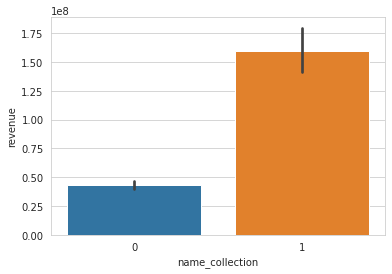

In [3]:
# relationship between revenue and collection
# Movies with collection have more revenue
origin_train['belongs_to_collection'].fillna(0, inplace=True)
draw_train = origin_train
draw_train['newbelongs_to_collection'] = draw_train['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)
draw_train['name_collection'] = draw_train['newbelongs_to_collection'].apply(lambda x: 1 if x != 0 else 0)
sns.barplot(x='name_collection',y='revenue',data=draw_train)

In [4]:
# checkout belongs_to_collection
# fill the NaN
origin_train['belongs_to_collection'].fillna(0, inplace=True)
origin_test['belongs_to_collection'].fillna(0, inplace=True)


def checkBelongs(target_list):
    # change the json into dic
    target_list['newbelongs_to_collection'] = target_list['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)

    # add one more collection name to store the collection name
    target_list['name_collection'] = target_list['newbelongs_to_collection'].apply(lambda x: x[0]['name'] if x != 0 else '0')
    # lable encoder
    le = LabelEncoder()
    le.fit(list(target_list['name_collection'].fillna('')))
    target_list['name_collection'] = le.transform(target_list['name_collection'].fillna('').astype(str))
    # drop the old belongs_to_collection and newbelongs_to_collection
    target_list.drop(['newbelongs_to_collection', 'belongs_to_collection'], axis = 1, inplace = True)

checkBelongs(origin_train)
checkBelongs(origin_test)
origin_train.head()
# # change the json into dic
# origin_train['newbelongs_to_collection'] = origin_train['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)

# # add one more collection name to store the collection name
# origin_train['name_collection'] = origin_train['newbelongs_to_collection'].apply(lambda x: x[0]['name'] if x != 0 else 0)

# # change the json into dic
# origin_test['newbelongs_to_collection'] = origin_test['belongs_to_collection'].apply(lambda x: literal_eval(x) if x != 0 else 0)

# # add one more collection name to store the collection name
# origin_test['name_collection'] = origin_test['newbelongs_to_collection'].apply(lambda x: x[0]['name'] if x != 0 else 0)

# # lable encoder
# le = LabelEncoder()
# le.fit(list(df['name_collection'].fillna('')))
# df['name_collection'] = le.transform(df['name_collection'].fillna('').astype(str))

# # drop the old belongs_to_collection and newbelongs_to_collection
# origin_train.drop(['newbelongs_to_collection', 'belongs_to_collection'], axis = 1, inplace = True)
# origin_test.drop(['newbelongs_to_collection', 'belongs_to_collection'], axis = 1, inplace = True)

# change the json into dic
# sns.set_style("whitegrid")
# sns.regplot(x='id',y='revenue',data=origin_train)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,name_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,152
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,366
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,1
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,1


The budget for some movies is 0. But in the real word, it should be really rare.

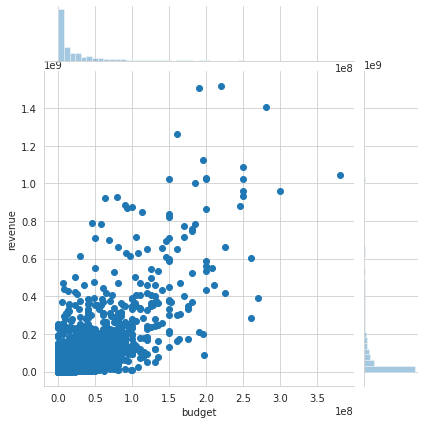

In [5]:
# checkout budget
origin_train['budget'].fillna(0, inplace=True)
origin_test['budget'].fillna(0, inplace=True)
sns.jointplot(x="budget", y="revenue", data=origin_train)

McKenzie (2012) believes that the relationship between budget and movie success is critical importance. So we choose to keep the 0 budget if the budget of this movie is not certain.

In [6]:
# checkout genres
origin_train['genres'].fillna(0, inplace=True)
origin_test['genres'].fillna(0, inplace=True)
# change the json into dic
origin_train['new_genres'] = origin_train['genres'].apply(lambda x: literal_eval(x) if x != 0 else 0)
origin_test['new_genres'] = origin_test['genres'].apply(lambda x: literal_eval(x) if x != 0 else 0)

origin_train['new_genres'].apply(lambda x: len(x) if x != 0 else 0).value_counts()
# only 7 movies don't have the genres

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: new_genres, dtype: int64

In [7]:
# check each genres for each movie
def check_genre(target_list):
    list_of_genres = list(target_list['new_genres'].apply(lambda x: [i['name'] for i in x] if x != 0 else []).values)
    target_list['all_genres'] = target_list['new_genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != 0 else '')
    generes_list = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common()]
    for g in generes_list:
        target_list['genre_' + g] = target_list['all_genres'].apply(lambda x: 1 if g in x else 0)

    target_list.drop(['genres', 'new_genres', 'all_genres'], axis = 1, inplace = True)

check_genre(origin_train)
check_genre(origin_test)
# drop the origin data
# origin_train.drop(['genres', 'new_genres'], axis = 1, inplace = True)
# origin_test.drop(['genres', 'new_genres'], axis = 1, inplace = True)

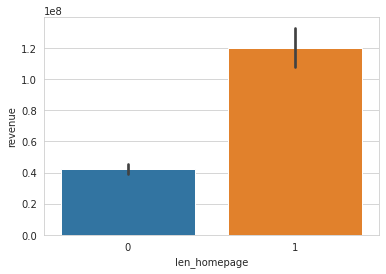

In [8]:
origin_train['homepage'].fillna(0, inplace=True)
origin_test['homepage'].fillna(0, inplace=True)

origin_train['len_homepage'] = origin_train['homepage'].apply(lambda x: 1 if x != 0 else 0)
sns.barplot(x='len_homepage',y='revenue',data=origin_train)

From the bar chart, the movie with homepage has more revenue.

In [9]:
# we transform homepage into len
origin_train['len_homepage'] = origin_train['homepage'].apply(lambda x: 1 if x != 0 else 0)
origin_test['len_homepage'] = origin_train['homepage'].apply(lambda x: 1 if x != 0 else 0)
# drop the origin data
origin_train.drop(['homepage'], axis = 1, inplace = True)
origin_test.drop(['homepage'], axis = 1, inplace = True)

In [10]:
# checkout imdb_id
origin_train['imdb_id'].apply(lambda x: len(x) if x != 0 else 0).value_counts()

9    3000
Name: imdb_id, dtype: int64

Since every movie has its own imdb_id which is unique to each movie, we can ignore this attribute.

In [11]:
# drop the origin data
origin_train.drop(['imdb_id'], axis = 1, inplace = True)
origin_test.drop(['imdb_id'], axis = 1, inplace = True)

In [12]:
# checkout original_language
origin_train['original_language'].apply(lambda x: x if x != 0 else 0).value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
da       5
fa       5
ro       4
tr       3
hu       3
no       2
te       2
fi       2
pl       2
ml       2
he       1
mr       1
vi       1
bn       1
cs       1
nb       1
ur       1
sr       1
ar       1
el       1
id       1
Name: original_language, dtype: int64

The value account shows that there are various original language. The data of this attribute will not change.

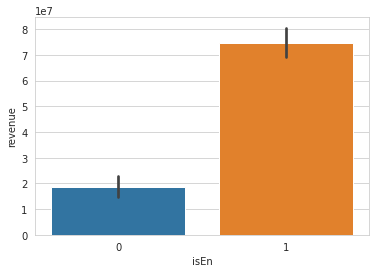

In [13]:
origin_train['isEn'] = origin_train['original_language'].apply(lambda x: 1 if x == 'en' else 0)
origin_test['isEn'] = origin_test['original_language'].apply(lambda x: 1 if x == 'en' else 0)
sns.barplot(x='isEn',y='revenue',data=origin_train)

The origin language with English can have more revenue

In [14]:
origin_train.drop(['original_language'], axis = 1, inplace = True)
origin_test.drop(['original_language'], axis = 1, inplace = True)

In [15]:
# checkout original_title
# I not sure how to make weight here, so I just use length 
# and keep the origin data
# we transform original_title into len
origin_train['len_orTit'] = origin_train['original_title'].apply(lambda x: len(x) if x != 0 else 0)
origin_test['len_orTit'] = origin_test['original_title'].apply(lambda x: len(x) if x != 0 else 0)
#origin_train.head()

In [16]:
# checkout overview
# I not sure how to make weight here, so I just use length 
# and keep the origin data. 
# we transform original_title into len
origin_train['overview'].fillna(0, inplace=True)
origin_test['overview'].fillna(0, inplace=True)
origin_train['len_over'] = origin_train['overview'].apply(lambda x: len(x) if x != 0 else 0)
origin_test['len_over'] = origin_test['overview'].apply(lambda x: len(x) if x != 0 else 0)
#origin_train.head()

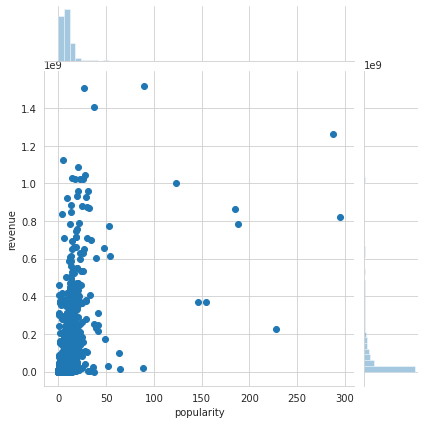

In [17]:
# Show the relationship between popularity and revenue
origin_train['popularity'].fillna(0, inplace=True)
origin_test['popularity'].fillna(0, inplace=True)
sns.jointplot(x="popularity", y="revenue", data=origin_train)

The above chart does not give clear relationship between popularity and revenue. The data will remain for further analysis.

We ignore the 'poster_path'. Even the poster should have some effect on motivating cutomers to watch movie. The anaylsis for image is a tough work. Besides, our concentration is focusing on the data that we can manipulate. Hence, we drop the img.

In [18]:
origin_train.drop(['poster_path'], axis = 1, inplace = True)
origin_test.drop(['poster_path'], axis = 1, inplace = True)

In [19]:
# checkout production_companies
# fill the NaN
origin_train['production_companies'].fillna(0, inplace=True)
origin_test['production_companies'].fillna(0, inplace=True)
# change the json into dic
origin_train['newproduction_companies'] = origin_train['production_companies'].apply(lambda x: literal_eval(x) if x != 0 else 0)

origin_test['newproduction_companies'] = origin_test['production_companies'].apply(lambda x: literal_eval(x) if x != 0 else 0)

origin_train['newproduction_companies'].apply(lambda x: len(x) if x != 0 else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: newproduction_companies, dtype: int64

The above data shows that every movie has at least on production company. The most one has 17. 

In [20]:
# Add length of production_companies
origin_train['len_proCom'] = origin_train['newproduction_companies'].apply(lambda x: len(x) if x != 0 else 0)
origin_test['len_proCom'] = origin_test['newproduction_companies'].apply(lambda x: len(x) if x != 0 else 0)
# drop the origin data
origin_train.drop(['newproduction_companies','production_companies'], axis = 1, inplace = True)
origin_test.drop(['newproduction_companies','production_companies'], axis = 1, inplace = True)
origin_train.head()

,id,budget,original_title,overview,popularity,production_countries,release_date,runtime,spoken_languages,status,...,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,len_homepage,isEn,len_orTit,len_over,len_proCom
0,1,14000000,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,0,1,22,155,3
1,2,40000000,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,0,1,40,393,1
2,3,3300000,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,0,0,0,0,0,1,1,8,130,3
3,4,1200000,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...,0,0,0,0,0,1,0,7,581,0
4,5,0,마린보이,Marine Boy is the story of a former national s...,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,...,0,0,0,0,0,0,0,4,168,0


In [24]:
# test xgb modelen_proCom

from sklearn.model_selection import KFold
import xgboost as xgb

test_index = ['budget','isEn','popularity','name_collection','len_homepage','len_orTit','len_over','len_proCom','revenue']

# collect all genres
for colum in origin_train:
    if colum.find('genre') != -1:
        test_index.append(colum)


test_data = origin_train.loc[:,test_index]
origin_train = origin_train.reset_index(drop=True)

split1 = int(0.8 * test_data.shape[0])
train_test = test_data[:split1]
test_test = test_data[split1:]

random_seed = 2019
k = 10
fold = list(KFold(k, shuffle = True, random_state = random_seed).split(train_test))
# np.random.seed(random_seed)
# test_index = ['budget','original_language','popularity','name_collection','len_genres','all_genres','len_homepage','len_orTit','len_over','len_proCom','revenue']

# np.random.shuffle(test_data)
# test_data.shape
# split = int(0.75 * test_data.shape[0])
# train_x = test_data.loc[:,test_index]
# train_y = test_data.loc[:,['revenue']]
# train_x.head()

In [25]:
# Reference from https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat/output
def xgb_model(trn_x, trn_y, val_x, val_y, test, verbose) :
    
    params = {'objective': 'reg:linear', 
              'eta': 0.01, 
              'max_depth': 6, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
              'seed': random_seed, 
              'silent': True,
    }
    
    record = dict()
    model = xgb.train(params
                      , xgb.DMatrix(trn_x, trn_y)
                      , 100000
                      , [(xgb.DMatrix(trn_x, trn_y), 'train'), (xgb.DMatrix(val_x, val_y), 'valid')]
                      , verbose_eval=verbose
                      , early_stopping_rounds=500
                      , callbacks = [xgb.callback.record_evaluation(record)])
    best_idx = np.argmin(np.array(record['valid']['rmse']))
    
    val_pred = model.predict(xgb.DMatrix(val_x), ntree_limit=model.best_ntree_limit)
    test_pred = model.predict(xgb.DMatrix(test), ntree_limit=model.best_ntree_limit)

    return {'val':val_pred, 'test':test_pred, 'error':record['valid']['rmse'][best_idx], 'importance':[i for k, i in model.get_score().items()]}

In [26]:
from datetime import datetime
verbose = False
y = train_test['revenue'].values
for i, (trn, val) in enumerate(fold) :
    print(i+1, "fold.    RMSE")
    print(len(trn), len(val))
    trn_x = train_test.loc[trn, :]
    trn_y = y[trn]
    val_x = train_test.loc[val, :]
    val_y = y[val]
    
    fold_val_pred = []
    fold_test_pred = []
    fold_err = []
    
    #""" xgboost
    start = datetime.now()
    result = xgb_model(trn_x, trn_y, val_x, val_y, test_test, verbose)
    fold_val_pred.append(result['val']*0.2)
    fold_test_pred.append(result['test']*0.2)
    fold_err.append(result['error'])
    print("xgb model.", "{0:.5f}".format(result['error']), '(' + str(int((datetime.now()-start).seconds/60)) + 'm)')

    

1 fold.    RMSE
2160 240
[19:37:57] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:37:57] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:10] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
xgb model. 12473796.00000 (0m)
2 fold.    RMSE
2160 240
[19:38:13] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:13] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGB

KeyboardInterrupt: 